In [1]:
import numpy as np
from matplotlib import image
import matplotlib.patches as patches
from pathlib import Path
from typing import Union, Tuple
import matplotlib.pyplot as plt

In [2]:
healthy_img = image.imread('example_images/IM-0127-0001.jpeg')
bacteria_img = image.imread('example_images/person338_bacteria_1568.jpeg')
virus_img = image.imread('example_images/person340_virus_698.jpeg')
print(f'Shape of healthy x-ray: {healthy_img.shape}')
print(f'Shape of bacterial x-ray: {bacteria_img.shape}')
print(f'Shape of viral x-ray: {virus_img.shape}')

Shape of healthy x-ray: (1306, 1974)
Shape of bacterial x-ray: (752, 1240)
Shape of viral x-ray: (1432, 1760)


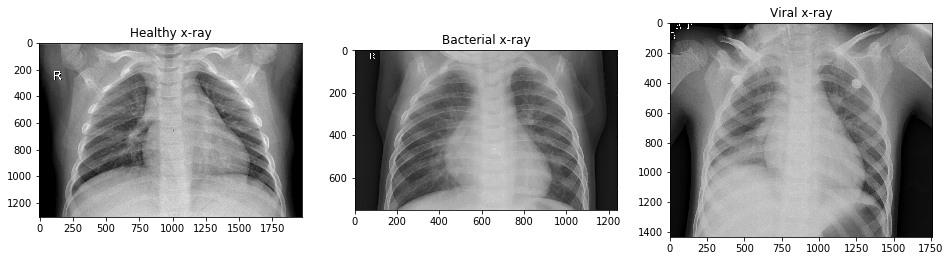

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(16.0,8.0))
axs[0].imshow(healthy_img, cmap='gray')
axs[0].set_title('Healthy x-ray')

axs[1].imshow(bacteria_img, cmap='gray')
axs[1].set_title('Bacterial x-ray')

axs[2].imshow(virus_img, cmap='gray')
axs[2].set_title('Viral x-ray')
plt.show()

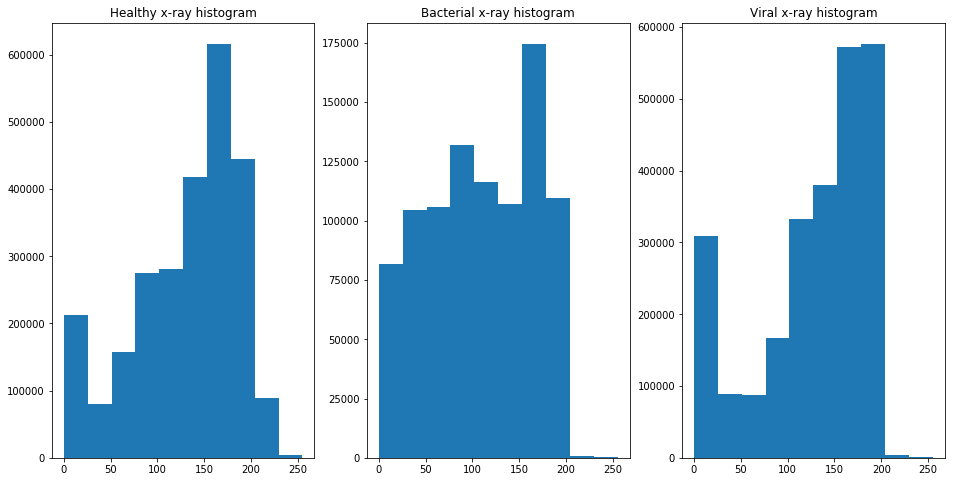

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(16.0, 8.0))
axs[0].hist(healthy_img.flatten())
axs[0].set_title('Healthy x-ray histogram')

axs[1].hist(bacteria_img.flatten())
axs[1].set_title('Bacterial x-ray histogram')

axs[2].hist(virus_img.flatten())
axs[2].set_title('Viral x-ray histogram')
plt.show()

In [5]:
def random_crop(img: np.ndarray, 
                crop_size_width: int,
                crop_size_height: int) -> Union[np.ndarray, Tuple[int, int, int, int]]:
    
    mod_crop_width = crop_size_width % 2
    mod_crop_height = crop_size_height % 2
    
    width = img.shape[1]
    height = img.shape[0]
    
    border_left = int(crop_size_width / 2) + mod_crop_width
    border_right = int(crop_size_width / 2)
    border_top = int(crop_size_height / 2) + mod_crop_height
    border_bottom = int(crop_size_height / 2)
    
    center_crop_width = np.random.randint(border_left, width - border_right)
    center_crop_height = np.random.randint(border_top, height - border_bottom)
    
    left_crop_img = center_crop_width - border_left
    right_crop_img = center_crop_width + border_right
    
    top_crop_img = center_crop_height - border_top
    bottom_crop_img = center_crop_height + border_bottom
    
    cropped_img = img[top_crop_img:bottom_crop_img, left_crop_img:right_crop_img]
    
    crop_tuple = (top_crop_img, bottom_crop_img, left_crop_img, right_crop_img,
                     center_crop_width, center_crop_height)
    
    return cropped_img, crop_tuple

Text(0.5, 1.0, 'Cropped viral x-ray')

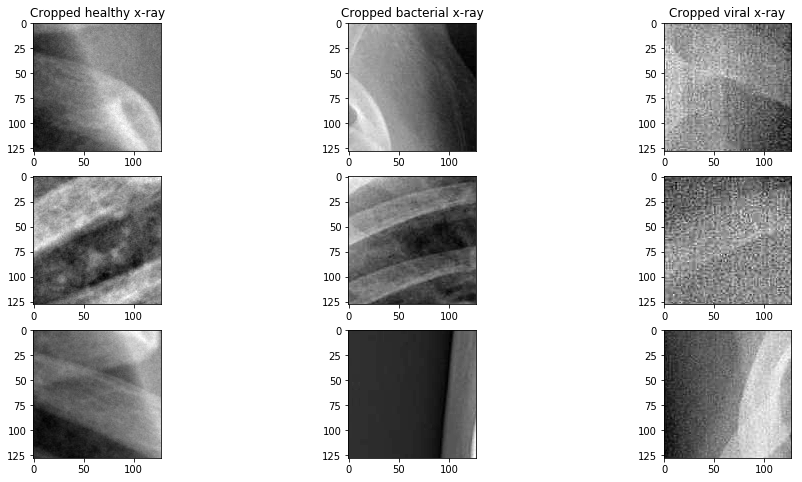

In [6]:
np.random.seed(1137)

CROP_SIZE = 128

cropped_healthy_img1, cropped_healthy_tuple1 = random_crop(healthy_img, CROP_SIZE, CROP_SIZE)
cropped_healthy_img2, cropped_healthy_tuple2 = random_crop(healthy_img, CROP_SIZE, CROP_SIZE)
cropped_healthy_img3, cropped_healthy_tuple3 = random_crop(healthy_img, CROP_SIZE, CROP_SIZE)

cropped_bacteria_img1, cropped_bacteria_tuple1 = random_crop(bacteria_img, CROP_SIZE, CROP_SIZE)
cropped_bacteria_img2, cropped_bacteria_tuple2 = random_crop(bacteria_img, CROP_SIZE, CROP_SIZE)
cropped_bacteria_img3, cropped_bacteria_tuple3 = random_crop(bacteria_img, CROP_SIZE, CROP_SIZE)

cropped_virus_img1, cropped_virus_tuple1 = random_crop(virus_img, CROP_SIZE, CROP_SIZE)
cropped_virus_img2, cropped_virus_tuple2 = random_crop(virus_img, CROP_SIZE, CROP_SIZE)
cropped_virus_img3, cropped_virus_tuple3 = random_crop(virus_img, CROP_SIZE, CROP_SIZE)

fig, axs = plt.subplots(3, 3, figsize=(16.0,8.0))
axs[0, 0].imshow(cropped_healthy_img1, cmap='gray')
axs[1, 0].imshow(cropped_healthy_img2, cmap='gray')
axs[2, 0].imshow(cropped_healthy_img3, cmap='gray')
axs[0, 0].set_title('Cropped healthy x-ray')

axs[0, 1].imshow(cropped_bacteria_img1, cmap='gray')
axs[1, 1].imshow(cropped_bacteria_img2, cmap='gray')
axs[2, 1].imshow(cropped_bacteria_img3, cmap='gray')
axs[0, 1].set_title('Cropped bacterial x-ray')

axs[0, 2].imshow(cropped_virus_img1, cmap='gray')
axs[1, 2].imshow(cropped_virus_img2, cmap='gray')
axs[2, 2].imshow(cropped_virus_img3, cmap='gray')
axs[0, 2].set_title('Cropped viral x-ray')

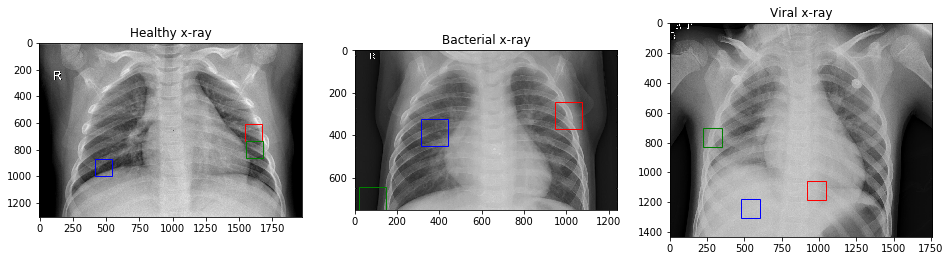

In [7]:

healthy_crop_rect1 = patches.Rectangle((cropped_healthy_tuple1[2], cropped_healthy_tuple1[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='r',
                                       facecolor='none')
healthy_crop_rect2 = patches.Rectangle((cropped_healthy_tuple2[2], cropped_healthy_tuple2[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='b',
                                       facecolor='none')
healthy_crop_rect3 = patches.Rectangle((cropped_healthy_tuple3[2], cropped_healthy_tuple3[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='g',
                                       facecolor='none')

bacteria_crop_rect1 = patches.Rectangle((cropped_bacteria_tuple1[2], cropped_bacteria_tuple1[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='r',
                                       facecolor='none')
bacteria_crop_rect2 = patches.Rectangle((cropped_bacteria_tuple2[2], cropped_bacteria_tuple2[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='b',
                                       facecolor='none')
bacteria_crop_rect3 = patches.Rectangle((cropped_bacteria_tuple3[2], cropped_bacteria_tuple3[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='g',
                                       facecolor='none')

virus_crop_rect1 = patches.Rectangle((cropped_virus_tuple1[2], cropped_virus_tuple1[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='r',
                                       facecolor='none')
virus_crop_rect2 = patches.Rectangle((cropped_virus_tuple2[2], cropped_virus_tuple2[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='b',
                                       facecolor='none')
virus_crop_rect3 = patches.Rectangle((cropped_virus_tuple3[2], cropped_virus_tuple3[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='g',
                                       facecolor='none')

fig, axs = plt.subplots(1, 3, figsize=(16.0,8.0))
axs[0].imshow(healthy_img, cmap='gray')
axs[0].add_patch(healthy_crop_rect1)
axs[0].add_patch(healthy_crop_rect2)
axs[0].add_patch(healthy_crop_rect3)
axs[0].set_title('Healthy x-ray')

axs[1].imshow(bacteria_img, cmap='gray')
axs[1].add_patch(bacteria_crop_rect1)
axs[1].add_patch(bacteria_crop_rect2)
axs[1].add_patch(bacteria_crop_rect3)
axs[1].set_title('Bacterial x-ray')

axs[2].imshow(virus_img, cmap='gray')
axs[2].add_patch(virus_crop_rect1)
axs[2].add_patch(virus_crop_rect2)
axs[2].add_patch(virus_crop_rect3)
axs[2].set_title('Viral x-ray')
plt.show()

I used a bit of Stack overflow

https://stackoverflow.com/questions/37411633/how-to-generate-a-random-normal-distribution-of-integers

In [8]:
def multinomial_random_crop(img: np.ndarray,
                            w_scale: float,
                            h_scale: float,
                            crop_size_width: int,
                            crop_size_height: int) -> Union[np.ndarray, Tuple[int, int, int, int]]:
    
    mod_crop_width = crop_size_width % 2
    mod_crop_height = crop_size_height % 2
    
    width = img.shape[1]
    height = img.shape[0]
    
    mid_horizontal = width/2
    mid_vertical = height/2
    
    border_left = int(crop_size_width / 2) + mod_crop_width
    border_right = int(crop_size_width / 2)
    border_top = int(crop_size_height / 2) + mod_crop_height
    border_bottom = int(crop_size_height / 2)
    
    center_crop_width = np.random.normal(loc=mid_horizontal, scale=w_scale, size=1).astype(int)[0]
    
    if center_crop_width < border_left:
        center_crop_width = border_left
    elif center_crop_width > (width - border_right):
        center_crop_width = width - border_right
        
    center_crop_height = np.random.normal(loc=mid_vertical, scale=h_scale, size=1).astype(int)[0]
    
    if center_crop_height < border_top:
        center_crop_height = border_left
    elif center_crop_height > (height - border_bottom):
        center_crop_height = height - border_bottom
    
    left_crop_img = center_crop_width - border_left
    right_crop_img = center_crop_width + border_right
    
    top_crop_img = center_crop_height - border_top
    bottom_crop_img = center_crop_height + border_bottom
    
    cropped_img = img[top_crop_img:bottom_crop_img, left_crop_img:right_crop_img]
    
    crop_tuple = (top_crop_img, bottom_crop_img, left_crop_img, right_crop_img, 
                  center_crop_width, center_crop_height)
    
    return cropped_img, crop_tuple

Text(0.5, 1.0, 'Distribution over height')

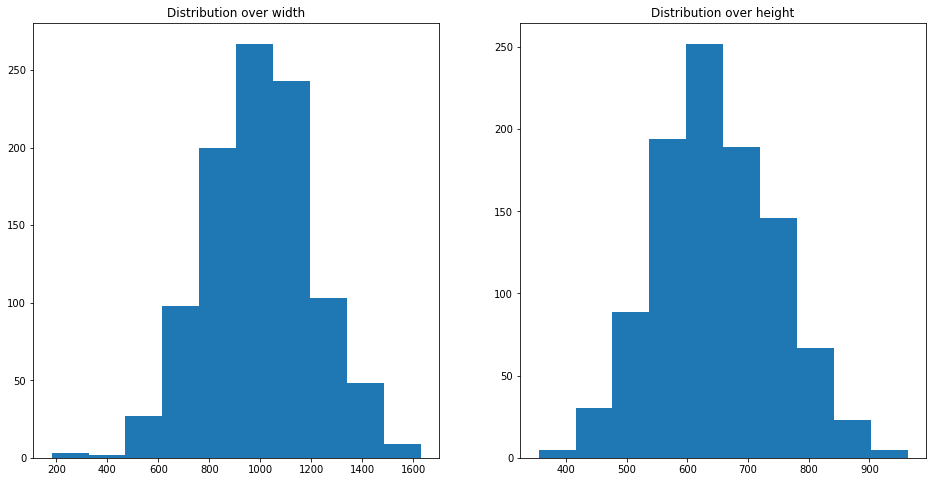

In [9]:
N = 1000
dist_w = np.zeros((N,))
dist_h = np.zeros((N,))
for i in range(N):
    _, t = multinomial_random_crop(healthy_img, 200.0, 100.0, CROP_SIZE, CROP_SIZE)
    dist_w[i] = t[4]
    dist_h[i] = t[5]
    
fig, axs = plt.subplots(1, 2, figsize=(16.0,8.0))
axs[0].hist(dist_w)
axs[0].set_title('Distribution over width')

axs[1].hist(dist_h)
axs[1].set_title('Distribution over height')

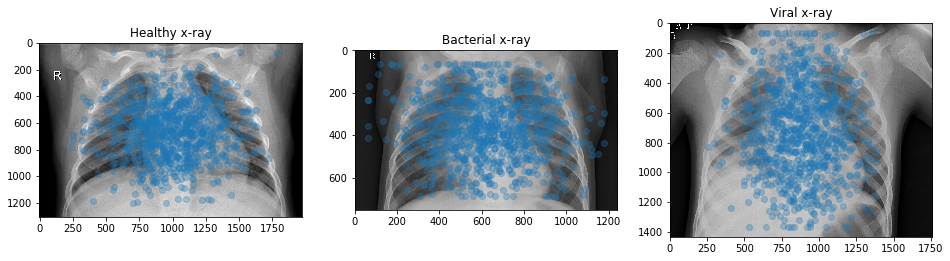

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(16.0,8.0))

dist_w = np.zeros((N,))
dist_h = np.zeros((N,))
for i in range(N):
    _, t = multinomial_random_crop(healthy_img, 250.0, 200.0, CROP_SIZE, CROP_SIZE)
    dist_w[i] = t[4]
    dist_h[i] = t[5]
axs[0].imshow(healthy_img, cmap='gray')
axs[0].scatter(dist_w, dist_h, alpha=0.3)
axs[0].set_title('Healthy x-ray')

dist_w = np.zeros((N,))
dist_h = np.zeros((N,))
for i in range(N):
    _, t = multinomial_random_crop(bacteria_img, 200.0, 150.0, CROP_SIZE, CROP_SIZE)
    dist_w[i] = t[4]
    dist_h[i] = t[5]
axs[1].imshow(bacteria_img, cmap='gray')
axs[1].scatter(dist_w, dist_h, alpha=0.3)
axs[1].set_title('Bacterial x-ray')

dist_w = np.zeros((N,))
dist_h = np.zeros((N,))
for i in range(N):
    _, t = multinomial_random_crop(virus_img, 200.0, 300.0, CROP_SIZE, CROP_SIZE)
    dist_w[i] = t[4]
    dist_h[i] = t[5]
axs[2].imshow(virus_img, cmap='gray')
axs[2].scatter(dist_w, dist_h, alpha=0.3)
axs[2].set_title('Viral x-ray')
plt.show()

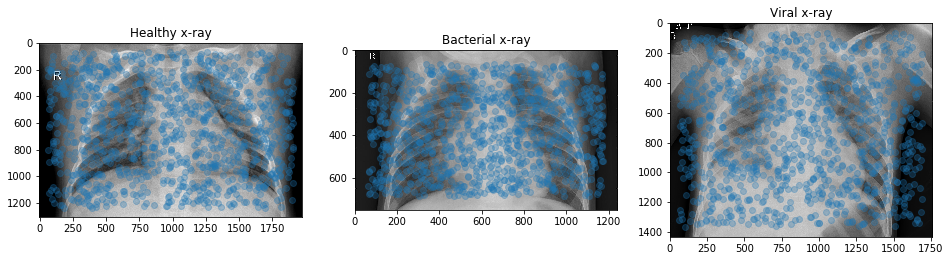

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(16.0,8.0))

dist_w = np.zeros((N,))
dist_h = np.zeros((N,))
for i in range(N):
    _, t = random_crop(healthy_img, CROP_SIZE, CROP_SIZE)
    dist_w[i] = t[4]
    dist_h[i] = t[5]
axs[0].imshow(healthy_img, cmap='gray')
axs[0].scatter(dist_w, dist_h, alpha=0.3)
axs[0].set_title('Healthy x-ray')

dist_w = np.zeros((N,))
dist_h = np.zeros((N,))
for i in range(N):
    _, t = random_crop(bacteria_img, CROP_SIZE, CROP_SIZE)
    dist_w[i] = t[4]
    dist_h[i] = t[5]
axs[1].imshow(bacteria_img, cmap='gray')
axs[1].scatter(dist_w, dist_h, alpha=0.3)
axs[1].set_title('Bacterial x-ray')

dist_w = np.zeros((N,))
dist_h = np.zeros((N,))
for i in range(N):
    _, t = random_crop(virus_img, CROP_SIZE, CROP_SIZE)
    dist_w[i] = t[4]
    dist_h[i] = t[5]
axs[2].imshow(virus_img, cmap='gray')
axs[2].scatter(dist_w, dist_h, alpha=0.3)
axs[2].set_title('Viral x-ray')
plt.show()

Text(0.5, 1.0, 'Cropped viral x-ray')

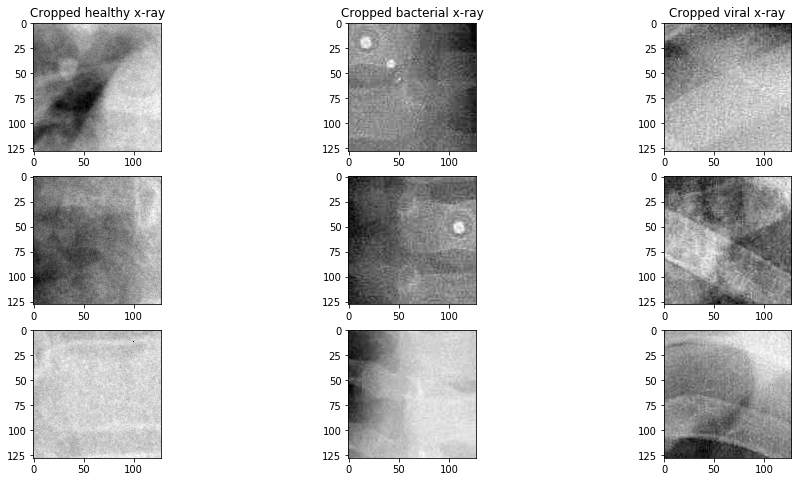

In [12]:
np.random.seed(1137)

CROP_SIZE = 128

cropped_healthy_img1, cropped_healthy_tuple1 = multinomial_random_crop(healthy_img, 250.0, 200.0, CROP_SIZE, CROP_SIZE)
cropped_healthy_img2, cropped_healthy_tuple2 = multinomial_random_crop(healthy_img, 250.0, 200.0, CROP_SIZE, CROP_SIZE)
cropped_healthy_img3, cropped_healthy_tuple3 = multinomial_random_crop(healthy_img, 250.0, 200.0, CROP_SIZE, CROP_SIZE)

cropped_bacteria_img1, cropped_bacteria_tuple1 = multinomial_random_crop(bacteria_img, 200.0, 150.0, CROP_SIZE, CROP_SIZE)
cropped_bacteria_img2, cropped_bacteria_tuple2 = multinomial_random_crop(bacteria_img, 200.0, 150.0, CROP_SIZE, CROP_SIZE)
cropped_bacteria_img3, cropped_bacteria_tuple3 = multinomial_random_crop(bacteria_img, 200.0, 150.0, CROP_SIZE, CROP_SIZE)

cropped_virus_img1, cropped_virus_tuple1 = multinomial_random_crop(virus_img, 200.0, 300.0, CROP_SIZE, CROP_SIZE)
cropped_virus_img2, cropped_virus_tuple2 = multinomial_random_crop(virus_img, 200.0, 300.0, CROP_SIZE, CROP_SIZE)
cropped_virus_img3, cropped_virus_tuple3 = multinomial_random_crop(virus_img, 200.0, 300.0, CROP_SIZE, CROP_SIZE)

fig, axs = plt.subplots(3, 3, figsize=(16.0,8.0))
axs[0, 0].imshow(cropped_healthy_img1, cmap='gray')
axs[1, 0].imshow(cropped_healthy_img2, cmap='gray')
axs[2, 0].imshow(cropped_healthy_img3, cmap='gray')
axs[0, 0].set_title('Cropped healthy x-ray')

axs[0, 1].imshow(cropped_bacteria_img1, cmap='gray')
axs[1, 1].imshow(cropped_bacteria_img2, cmap='gray')
axs[2, 1].imshow(cropped_bacteria_img3, cmap='gray')
axs[0, 1].set_title('Cropped bacterial x-ray')

axs[0, 2].imshow(cropped_virus_img1, cmap='gray')
axs[1, 2].imshow(cropped_virus_img2, cmap='gray')
axs[2, 2].imshow(cropped_virus_img3, cmap='gray')
axs[0, 2].set_title('Cropped viral x-ray')

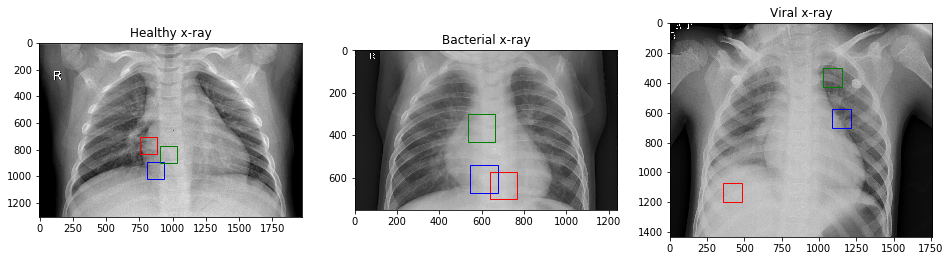

In [13]:

healthy_crop_rect1 = patches.Rectangle((cropped_healthy_tuple1[2], cropped_healthy_tuple1[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='r',
                                       facecolor='none')
healthy_crop_rect2 = patches.Rectangle((cropped_healthy_tuple2[2], cropped_healthy_tuple2[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='b',
                                       facecolor='none')
healthy_crop_rect3 = patches.Rectangle((cropped_healthy_tuple3[2], cropped_healthy_tuple3[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='g',
                                       facecolor='none')

bacteria_crop_rect1 = patches.Rectangle((cropped_bacteria_tuple1[2], cropped_bacteria_tuple1[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='r',
                                       facecolor='none')
bacteria_crop_rect2 = patches.Rectangle((cropped_bacteria_tuple2[2], cropped_bacteria_tuple2[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='b',
                                       facecolor='none')
bacteria_crop_rect3 = patches.Rectangle((cropped_bacteria_tuple3[2], cropped_bacteria_tuple3[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='g',
                                       facecolor='none')

virus_crop_rect1 = patches.Rectangle((cropped_virus_tuple1[2], cropped_virus_tuple1[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='r',
                                       facecolor='none')
virus_crop_rect2 = patches.Rectangle((cropped_virus_tuple2[2], cropped_virus_tuple2[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='b',
                                       facecolor='none')
virus_crop_rect3 = patches.Rectangle((cropped_virus_tuple3[2], cropped_virus_tuple3[1]),
                                       CROP_SIZE, CROP_SIZE, linewidth=1, edgecolor='g',
                                       facecolor='none')

fig, axs = plt.subplots(1, 3, figsize=(16.0,8.0))
axs[0].imshow(healthy_img, cmap='gray')
axs[0].add_patch(healthy_crop_rect1)
axs[0].add_patch(healthy_crop_rect2)
axs[0].add_patch(healthy_crop_rect3)
axs[0].set_title('Healthy x-ray')

axs[1].imshow(bacteria_img, cmap='gray')
axs[1].add_patch(bacteria_crop_rect1)
axs[1].add_patch(bacteria_crop_rect2)
axs[1].add_patch(bacteria_crop_rect3)
axs[1].set_title('Bacterial x-ray')

axs[2].imshow(virus_img, cmap='gray')
axs[2].add_patch(virus_crop_rect1)
axs[2].add_patch(virus_crop_rect2)
axs[2].add_patch(virus_crop_rect3)
axs[2].set_title('Viral x-ray')
plt.show()